In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%matplotlib notebook

In [2]:
# The game of life is totalistic, it depends on the total number of neighbours
# If a live cell has 2 or 3 nbhs it stays alive else it dies
# If a dead cell has 3 live nbhs then it will come alive

def stepforward(z): 
    '''
    stepforward: general cellular automata
    
    A cell will add its value to the cells around it.
    '''
    zalive = z.copy()

    uza = np.roll(zalive, 1, 0) #neighbour above
    dza = np.roll(zalive, -1, 0) #neighbour below
    rza = np.roll(zalive, -1, 1) #neighbour on right
    lza = np.roll(zalive, 1, 1) #neighbour on left
    urza = np.roll(uza, -1, 1) #up and right
    ulza = np.roll(uza, 1, 1) #up and left
    drza = np.roll(dza, -1, 1) #down and right
    dlza = np.roll(dza, 1, 1) #down and left
    nbrs = uza + dza + rza + lza + urza + ulza + drza + dlza
    
    alive = (zalive==1)
    dead = (zalive==0)
    
    nbrs0 = (nbrs == 0)
    nbrs1 = (nbrs == 1)
    nbrs2 = (nbrs == 2)
    nbrs3 = (nbrs == 3)
    nbrs4 = (nbrs == 4)
    nbrs5 = (nbrs == 5)
    nbrs6 = (nbrs == 6)
    nbrs7 = (nbrs == 7)
    nbrs8 = (nbrs == 8)
    
    # death
    z[np.logical_and(1 - nbrs2 - nbrs3,alive)] = 0

    # life
    z[np.logical_and(nbrs3,dead)] = 1
    
    return z

<IPython.core.display.Javascript object>


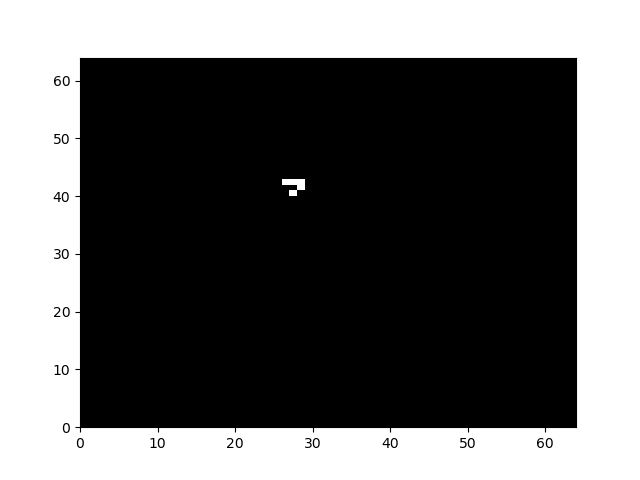

In [3]:
# Create your initial conditions

rows = 1
cols = 1
fig, ax = plt.subplots(rows,cols) 

nx, ny = (64, 64)

x = np.round(np.linspace(0, nx, nx+1))
y = np.round(np.linspace(0, ny, ny+1))
z = 0*np.floor(2*np.random.rand(ny,nx))

# Uncomment the line below for random initial conditions:
#z = np.floor(2*np.random.rand(ny,nx))

ax.pcolormesh(x,y,z,shading='auto', cmap=cm.gray)

def OnClick(event):
    z[int(np.floor(event.ydata)),int(np.floor(event.xdata))] = 1 - z[int(np.floor(event.ydata)),int(np.floor(event.xdata))]
    ax.pcolormesh(x,y,z,shading='auto', cmap=cm.gray)
    

cid = fig.canvas.mpl_connect('button_press_event', OnClick)




<IPython.core.display.Javascript object>


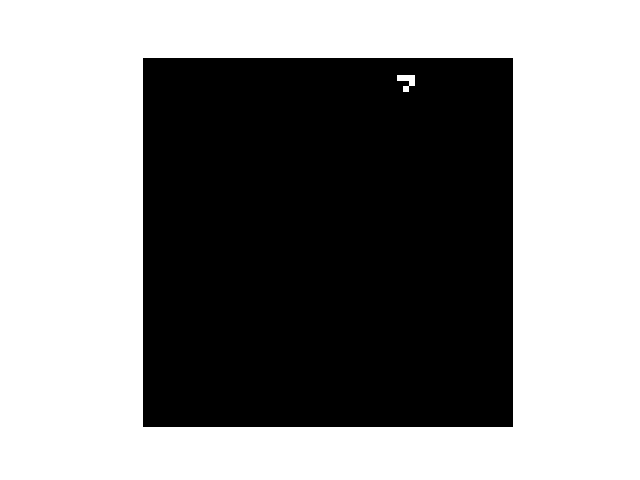

In [6]:

i = 0
rows = 1
cols = 1
fig, ax = plt.subplots(rows,cols) 

global zn
zn = []

zn.append(z.copy())
    
quads = []

quads.append(ax.pcolormesh(x,y,zn[i],shading='auto', cmap=cm.gray))
ax.set_aspect('equal', adjustable='box')
ax.set_axis_off()
#ax.set_title('GOL{}'.format(i+1))
    
def animate(frame):
    global zn
    zn[i] = stepforward(zn[i])
    quads[i].set_array(zn[i])
    quads[i].set_clim(0,1)
    zn[i][zn[i]<0] = 0
            
    return quads

anim = animation.FuncAnimation(fig,animate,frames=400,interval=50,blit=False,repeat=True)
#anim.save('I4280122.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
plt.show()